<a href="https://colab.research.google.com/github/NoSeUsarJS/Inteligencia-Artificial/blob/main/Tarea1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset: https://www.kaggle.com/datasets/dansbecker/powerlifting-database

Debido a la limitación de hardware que posee Google Colab (12,7 GB de RAM) se modificará la estructura del dataset en tiempo de ejecución para reducir la carga computacional.

In [ ]:
!pip uninstall bnlearn -y
!pip uninstall numpy -y
!pip install numpy==1.23.5
!pip install bnlearn==0.7


Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.2 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 KB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.6 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=d7e91541f1941d51a95d5b3cff60180facef1f4605f103f4b0a1d6f0df3c2b04
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1ca08957e051ba72101dc9a1fc220b6ea09b6ff17307691f8ab3989e33df90fc
  Stored in di

In [ ]:
#PROBLEMA 1
import bnlearn as bn
import pandas as pd
import time
import math as m

df = pd.read_csv('openpowerlifting.csv')

df.drop(['Name'], axis = 1, inplace = True)
df.drop(['MeetID'], axis = 1, inplace = True)
df.drop(['Squat4Kg'], axis = 1, inplace = True)
df.drop(['Bench4Kg'], axis = 1, inplace = True)
df.drop(['Deadlift4Kg'], axis = 1, inplace = True)
df.drop(['Wilks'], axis = 1, inplace = True)
df.drop(['WeightClassKg'], axis = 1, inplace = True)
df.drop(['BestBenchKg'], axis = 1, inplace = True)
df.drop(['BestSquatKg'], axis = 1, inplace = True)
df.drop(['Age'], axis = 1, inplace = True)
df.drop(['Place'], axis = 1, inplace = True)
df.drop(['Division'], axis = 1, inplace = True)

df = df.drop(df[df.isna().any(axis=1)].index)

rows_n = df.shape[0]

df['BodyweightKg'] = pd.qcut(df['BodyweightKg'], q=10)
df['TotalKg'] = pd.qcut(df['TotalKg'], q=10)
df['BestDeadliftKg'] = pd.qcut(df['BestDeadliftKg'], q=10)

model = bn.structure_learning.fit(df)
model = bn.independence_test(model, df)
model = bn.parameter_learning.fit(model, df, methodtype="bayes")

def get_interval (value, col):
  unique_values = df[col]

  for u_val in unique_values:
    if value in u_val:
      print("Con " + col + " entre " + str(u_val))
      return u_val

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of Equipment:
+-----------------------+-----+---------------------------+
| TotalKg               | ... | TotalKg((690.0, 1365.31]) |
+-----------------------+-----+---------------------------+
| Equipment(Multi-ply)  | ... | 0.10681144477381106       |
+-----------------------+-----+---------------------------+
| Equipment(Raw)        | ... | 0.27432658847789665       |
+-----------------------+-----+---------------------------+
| Equipment(Single-ply) | ... | 0.34621085191390644       |
+-----------------------+-----+---------------------------+
| Equipment(Straps)     | ... | 0.0006444129398118315     |
+-----------------------+-----+---------------------------+
| Equipment(Wraps)      | ... | 0.27200670189457404       |
+---

Numero de registros: 311314
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


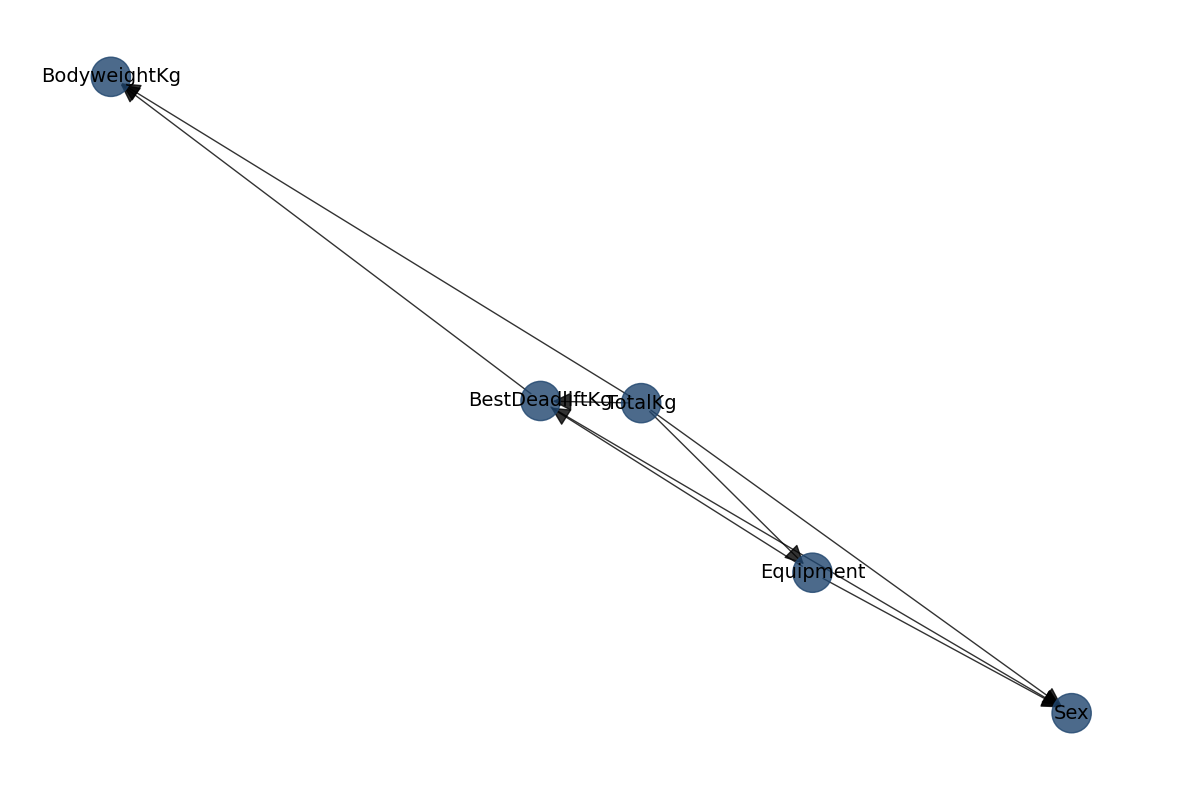

{'pos': {'Sex': array([ 0.8035365 , -0.78479418]),
  'Equipment': array([ 0.32628563, -0.39081662]),
  'BodyweightKg': array([-0.96594743,  1.        ]),
  'BestDeadliftKg': array([-0.17459713,  0.09086004]),
  'TotalKg': array([0.01072243, 0.08475076])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f4d92f0ce80>,
 'node_properties': {'Sex': {'node_color': '#1f456e', 'node_size': 800},
  'Equipment': {'node_color': '#1f456e', 'node_size': 800},
  'BodyweightKg': {'node_color': '#1f456e', 'node_size': 800},
  'BestDeadliftKg': {'node_color': '#1f456e', 'node_size': 800},
  'TotalKg': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Equipment', 'Sex'): {'color': '#000000', 'weight': 1},
  ('Equipment', 'BestDeadliftKg'): {'color': '#000000', 'weight': 1},
  ('BestDeadliftKg', 'Sex'): {'color': '#000000', 'weight': 1},
  ('BestDeadliftKg', 'BodyweightKg'): {'color': '#000000', 'weight': 1},
  ('TotalKg', 'Sex'): {'color': '#000000', 'weight': 1},
  ('TotalKg', 'Equipme

In [ ]:
#Visualizar cantidad de registros del dataset después de ser modificado.
print("Numero de registros: " + str(rows_n))
bn.plot(model)

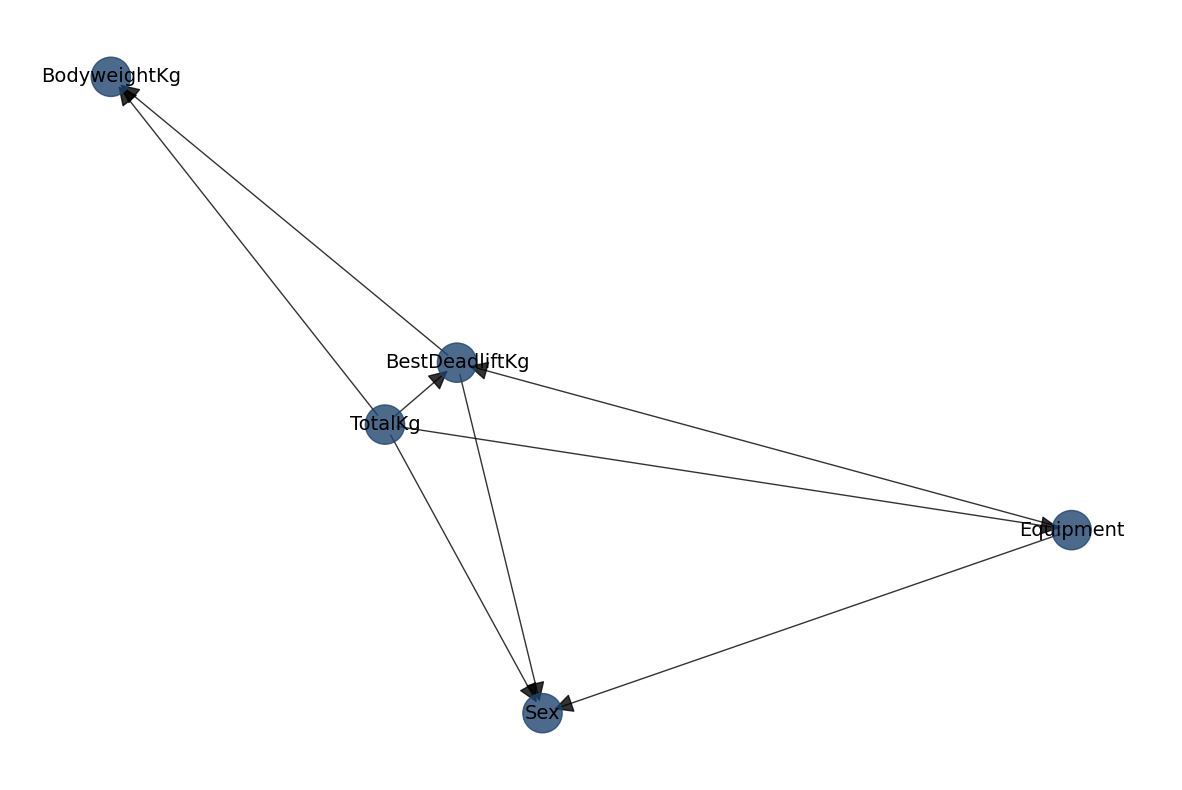

In [ ]:
query1_1 = bn.inference.fit(model, variables=['TotalKg'], evidence={'Sex': 'F', 'BodyweightKg': get_interval(68, 'BodyweightKg')})
query1_2 = bn.inference.fit(model, variables=['BestDeadliftKg'], evidence={'Sex': 'F', 'BodyweightKg': get_interval(68, 'BodyweightKg')})
query1_3 = bn.inference.fit(model, variables=['Equipment'], evidence={'Sex': 'F', 'BodyweightKg': get_interval(68, 'BodyweightKg')})
print(query1_1, '\n', query1_2, '\n', query1_3)

Con BodyweightKg entre (65.95, 72.48]
[bnlearn] >Variable Elimination..
+----+-----------+----------+
|    |   TotalKg |        p |
+====+===========+==========+
|  0 |         0 | 0.225849 |
+----+-----------+----------+
|  1 |         1 | 0.298664 |
+----+-----------+----------+
|  2 |         2 | 0.271647 |
+----+-----------+----------+
|  3 |         3 | 0.141806 |
+----+-----------+----------+
|  4 |         4 | 0.045055 |
+----+-----------+----------+
Con BodyweightKg entre (65.95, 72.48]
[bnlearn] >Variable Elimination..
+----+------------------+-----------+
|    |   BestDeadliftKg |         p |
+====+==================+===========+
|  0 |                0 | 0.293416  |
+----+------------------+-----------+
|  1 |                1 | 0.308513  |
+----+------------------+-----------+
|  2 |                2 | 0.223547  |
+----+------------------+-----------+
|  3 |                3 | 0.128643  |
+----+------------------+-----------+
|  4 |                4 | 0.0322847 |
+----+----

Consulta: Sex = F & BodyweightKg = (65.95, 72.48]

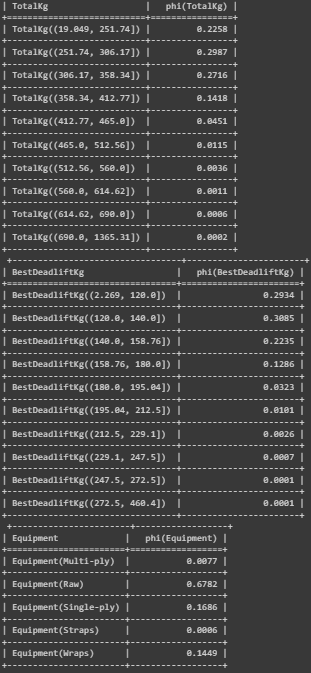

In [ ]:
query2_1 = bn.inference.fit(model, variables=['TotalKg'], evidence={'Sex': 'M', 'Equipment': 'Raw'})
query2_2 = bn.inference.fit(model, variables=['BestDeadliftKg'], evidence={'Sex': 'M', 'Equipment': 'Raw'})
query2_3 = bn.inference.fit(model, variables=['BodyweightKg'], evidence={'Sex': 'M', 'Equipment': 'Raw'})
print(query2_1, '\n', query2_2, '\n', query2_3)

Consulta 2: Sex = M & Equipment = Raw

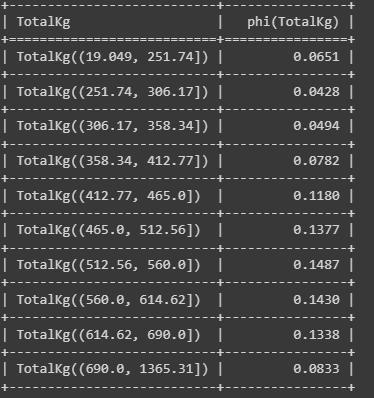
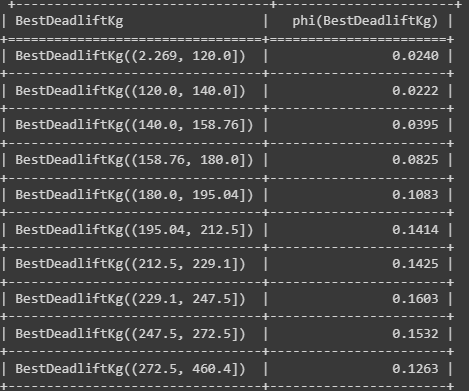
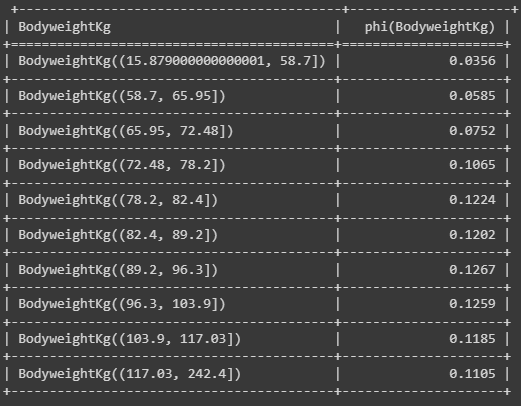


In [ ]:
query3_1 = bn.inference.fit(model, variables=['TotalKg'], evidence={'BestDeadliftKg': get_interval(150, 'BestDeadliftKg'), 'Equipment': 'Wraps'})
query3_2 = bn.inference.fit(model, variables=['Sex'], evidence={'BestDeadliftKg': get_interval(150, 'BestDeadliftKg'), 'Equipment': 'Wraps'})
query3_3 = bn.inference.fit(model, variables=['BodyweightKg'], evidence={'BestDeadliftKg': get_interval(150, 'BestDeadliftKg'), 'Equipment': 'Wraps'})
print(query3_1, '\n', query3_2, '\n', query3_3)

Consulta 3: BestDeadliftKg = (140.0, 158.76] & Equipment = Wraps

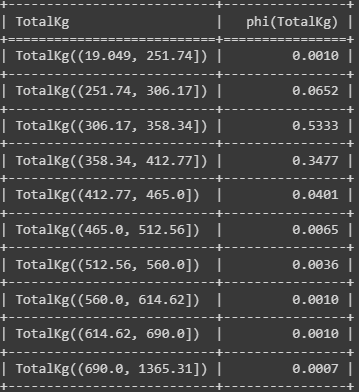
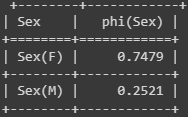
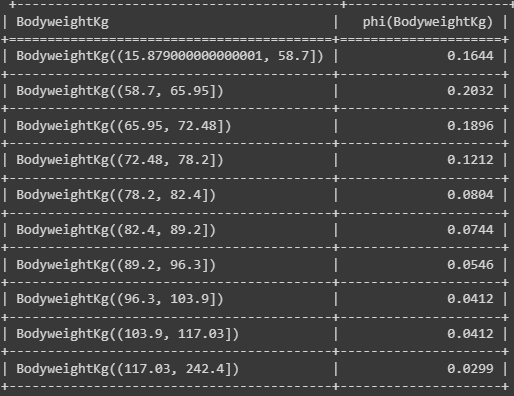

In [ ]:
#PROBLEMA 2
import numpy as np
import matplotlib.pyplot as plt

def random_walk (inicio, iteraciones, game_prob):
  games = ["J1", "J2", "J3", "J4", "J5", "J6", "J7"]
  contador = [0, 0, 0, 0, 0, 0, 0]
  camino = [inicio]
  i = inicio
  for _ in range (iteraciones):
    i = np.random.choice(7, p = game_prob[i])
    contador[i] += 1
    camino.append(i)

  prob = []
  for j in range(7):
    division = contador[j]/iteraciones
    prob.append(division)

  print(prob)

  '''
  plt.title("Random Walk de "+str(iteraciones)+" iteraciones")
  plt.ylim(0, 1)
  plt.plot(games, prob)
  '''

matriz_trans = []
matriz_trans.append([0.23, 0.18, 0.17, 0.15, 0.12, 0.12, 0.03])
matriz_trans.append([0.21, 0.07, 0.08, 0.19, 0.21, 0.02, 0.22])
matriz_trans.append([0.24, 0.13, 0.17, 0.14, 0.17, 0.03, 0.12])
matriz_trans.append([0.12, 0.13, 0.15, 0.00, 0.18, 0.21, 0.21])
matriz_trans.append([0.11, 0.16, 0.17, 0.20, 0.15, 0.12, 0.09])
matriz_trans.append([0.20, 0.20, 0.20, 0.15, 0.15, 0.05, 0.05])
matriz_trans.append([0.22, 0.22, 0.11, 0.18, 0.09, 0.18, 0.00])

print("4 simulaciones de 50 días de juego continuo:")
random_walk(0, 50, matriz_trans)
random_walk(0, 50, matriz_trans)
random_walk(0, 50, matriz_trans)
random_walk(0, 50, matriz_trans)

print("\n4 simulaciones de 100 días de juego continuo:")
random_walk(0, 100, matriz_trans)
random_walk(0, 100, matriz_trans)
random_walk(0, 100, matriz_trans)
random_walk(0, 100, matriz_trans)

print("\n4 simulaciones de 300 días de juego continuo:")
random_walk(0, 300, matriz_trans)
random_walk(0, 300, matriz_trans)
random_walk(0, 300, matriz_trans)
random_walk(0, 300, matriz_trans)

print ("\nEXTRA 4 simulaciones de 30000 días de juego continuo")
random_walk(0, 30000, matriz_trans)
random_walk(0, 30000, matriz_trans)
random_walk(0, 30000, matriz_trans)
random_walk(0, 30000, matriz_trans)

4 simulaciones de 50 días de juego continuo:
[0.24, 0.14, 0.16, 0.14, 0.12, 0.08, 0.12]
[0.14, 0.22, 0.16, 0.14, 0.1, 0.14, 0.1]
[0.14, 0.16, 0.22, 0.14, 0.1, 0.14, 0.1]
[0.2, 0.14, 0.08, 0.12, 0.26, 0.1, 0.1]

4 simulaciones de 100 días de juego continuo:
[0.23, 0.21, 0.13, 0.13, 0.12, 0.09, 0.09]
[0.2, 0.16, 0.12, 0.17, 0.18, 0.06, 0.11]
[0.26, 0.17, 0.16, 0.13, 0.11, 0.09, 0.08]
[0.23, 0.14, 0.15, 0.1, 0.1, 0.12, 0.16]

4 simulaciones de 300 días de juego continuo:
[0.19666666666666666, 0.13333333333333333, 0.15666666666666668, 0.12333333333333334, 0.18666666666666668, 0.08333333333333333, 0.12]
[0.21, 0.15333333333333332, 0.15333333333333332, 0.13333333333333333, 0.16, 0.09666666666666666, 0.09333333333333334]
[0.19333333333333333, 0.12666666666666668, 0.19666666666666666, 0.13333333333333333, 0.17333333333333334, 0.09, 0.08666666666666667]
[0.18333333333333332, 0.10333333333333333, 0.15666666666666668, 0.15, 0.16333333333333333, 0.12, 0.12333333333333334]

EXTRA 4 simulaciones de 

Como se puede observar, a medida que se simula con más iteraciones, se va obteniendo un resultado más acotado o con menores diferencias. Para corrobar mejor lo dicho, observar el caso extra de 30000 días continuos.

In [ ]:
def bubbleSort (arr1, arr2):
  for i in range(len(arr1)):
    for j in range(i, len(arr1)):
      if arr1[i] < arr1[j]:
        aux = arr1[i]
        arr1[i] = arr1[j]
        arr1[j] = aux

        aux2 = arr2[i]
        arr2[i] = arr2[j]
        arr2[j] = aux2

        return arr1, arr2

def more_prob(matrix):
    matrix = np.array(matrix)
    valpropios, vecpropios = np.linalg.eig(matrix.T)
    idx = np.where(np.isclose(valpropios, 1))[0][0]
    prob = vecpropios[:, idx]
    prob = prob / np.sum(prob)
    retorno = bubbleSort(prob, ["J1", "J2", "J3", "J4", "J5", "J6", "J7"])
    print(retorno[1][0:3])
    print(np.real(retorno[0][0:3]))

more_prob (matriz_trans)

['J1', 'J5', 'J3']
[0.18994881 0.15434773 0.15017501]


Se encontraron de manera analítica los 3 juegos más probables a jugar, gracias a los valores y vectores propios de la matriz de transferencia.

De esta manera se pueden obtener valores más precisos en comparación al método de iteraciones, pues con el segundo se intenta aproximar a la solución, mientras que con el primero se obtiene una solución exacta.
Por el lado de la carga computacional, puede ser mayor con un método iterativo, no así con la manera analítica, ya que con esta se puede obtener el resultado en un tiempo casi instantáneo.